Non Linear Regression Analysis

If the data shows curvy trend, then linear regression will not produce very accurate results when compared to non linear regression because, as the name implies,linear regression presumes that the data is linear.Let's learn about non-linear regressions and apply an example on python.In this notebook, we fit a non linear model to the data points that corresponding to China's GDP from 1960 to 2014.

Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Though Linear regression is very good to solve many problems,it can not be used for all datasets.First recall how linear regression,
could model a dataset.It models a linear relation between a dependent variable y and independent variable x.It had a simple equation,
of degree 1 for example y = 2x + 3

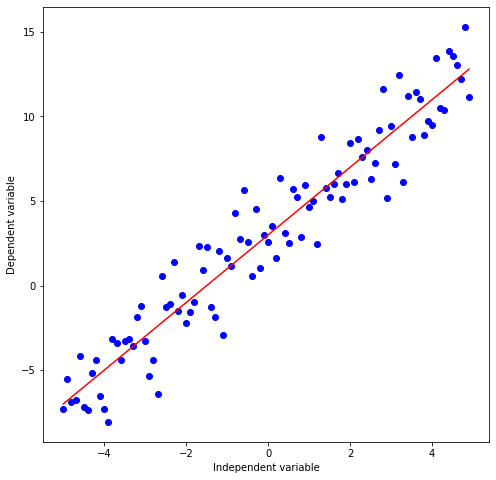

In [2]:
x = np.arange(-5.0,5.0,0.1)
y = 2 * x + 3
y_noise =  2 * np.random.normal(size = x.size)
y_data = y + y_noise
plt.figure(figsize=(8,8))
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()



Non-linear regressions are a relationship between independent variables x and a dependent variable y which result in a non linear function modeled 
data.Essentially any relationship that is not linear can termed as non-linear and is usually represented by the polynomila of k degrees(maximum power of x).
$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials,logarithms,fractions,and others.For example: $$ \ y = \log(x)$$

or even,more complicated such as :
$$ y = \log(a x^3 + b x^ 2 + c x + d \ $$


Let's take a look at cubic function's graph

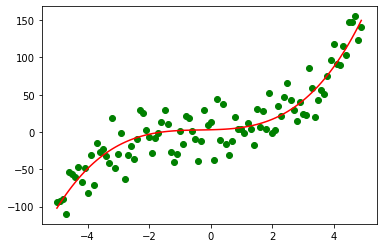

In [21]:
x = np.arange(-5.0,5.0,0.1)
y = 1 * (x ** 3) + 1 * (x ** 2) + 1 * x + 3
y_noise = 20 * np.random.normal(size = x.size)
y_data = y + y_noise
plt.scatter(x,y_data,color = 'green')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.sho